In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.simplefilter("ignore")

In [137]:
data = pd.read_csv("data/Housing.csv", sep=",")
print("Aperçu du jeu de données :")
print(data.head())

Aperçu du jeu de données :
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [138]:
#print the sample of the dataset
print("Taille du dataset :", data.shape)

Taille du dataset : (545, 13)


In [139]:
# Drop the non-necessary columns
data.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)
# Print the dataset size after dropping columns
print("Taille du dataset après suppression des colonnes :", data.shape)

Taille du dataset après suppression des colonnes : (545, 6)


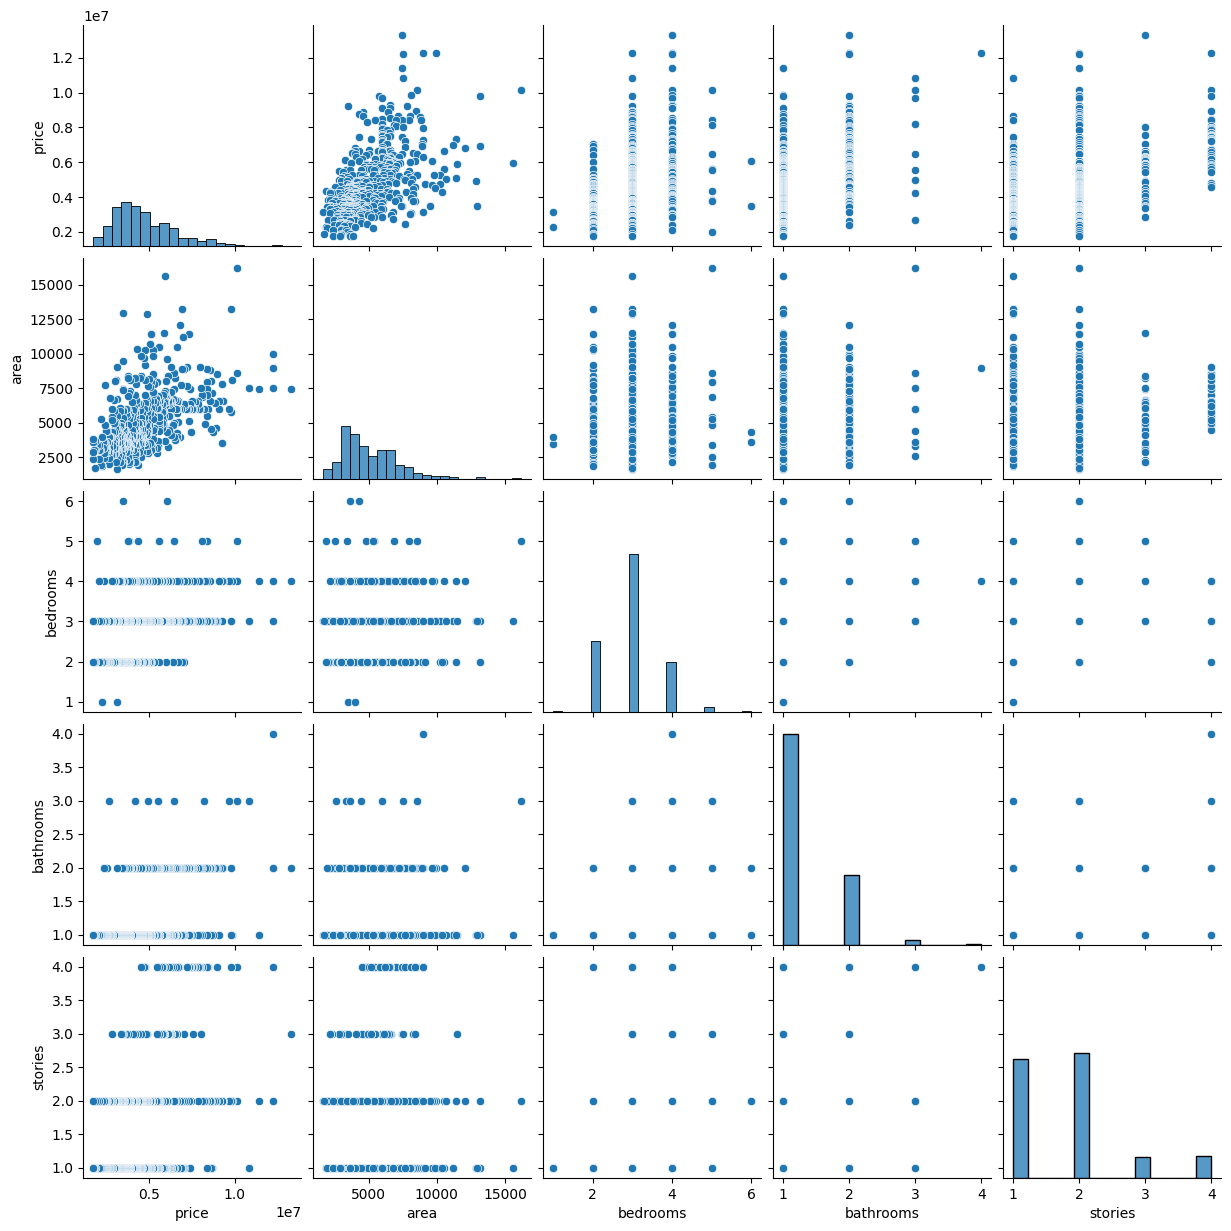

In [140]:
sns.pairplot(data, vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories'])
plt.show()

In [141]:
# extract the values ​​of the price (your target vector) into a new variable and display its size
y = data['price']
print("Taille du vecteur cible :", y.shape[0])

Taille du vecteur cible : 545


In [142]:
#drop the price column from the dataset 
X = data.drop(columns=['price'], axis=1)
print("Colonnes utilisées pour la prédiction :", X.columns.tolist())

Colonnes utilisées pour la prédiction : ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data and original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [144]:
#create a Lasso model with the alpha parameter equal to 0.2
model = Lasso(alpha=0.2)
#do a fit on your dataset
model.fit(X, y)

Lasso(alpha=0.2)

In [145]:
#print the coef_ of your model
print("Coefficients du modèle Lasso avec alpha=0.2 :", model.coef_)

Coefficients du modèle Lasso avec alpha=0.2 : [3.31115570e+02 1.67809637e+05 1.13373952e+06 5.47939713e+05
 3.77596042e+05]


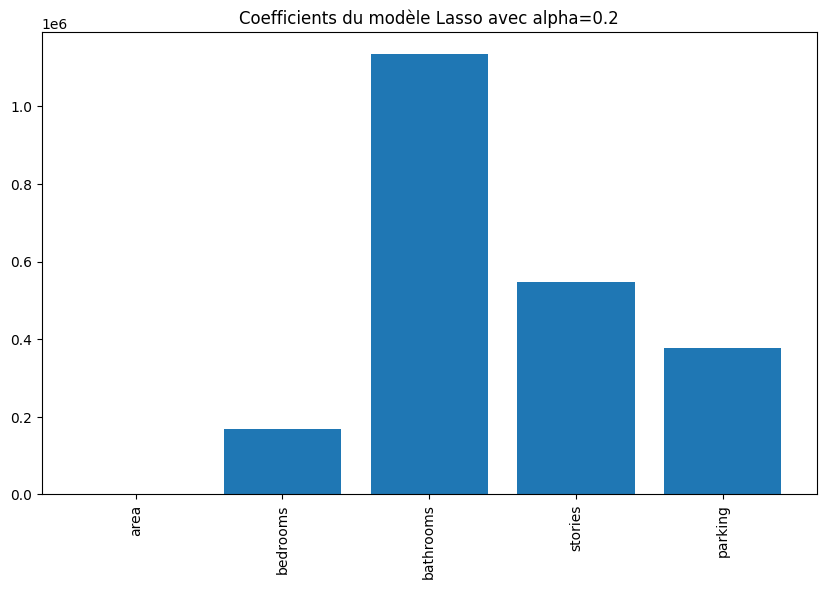

In [147]:
#plot the coef_ of your model
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=90)
plt.title("Coefficients du modèle Lasso avec alpha=0.2")
plt.show()


Coefficients du modèle Lasso avec alpha=0.5 : [3.31115682e+02 1.67809411e+05 1.13373855e+06 5.47939568e+05
 3.77595671e+05]


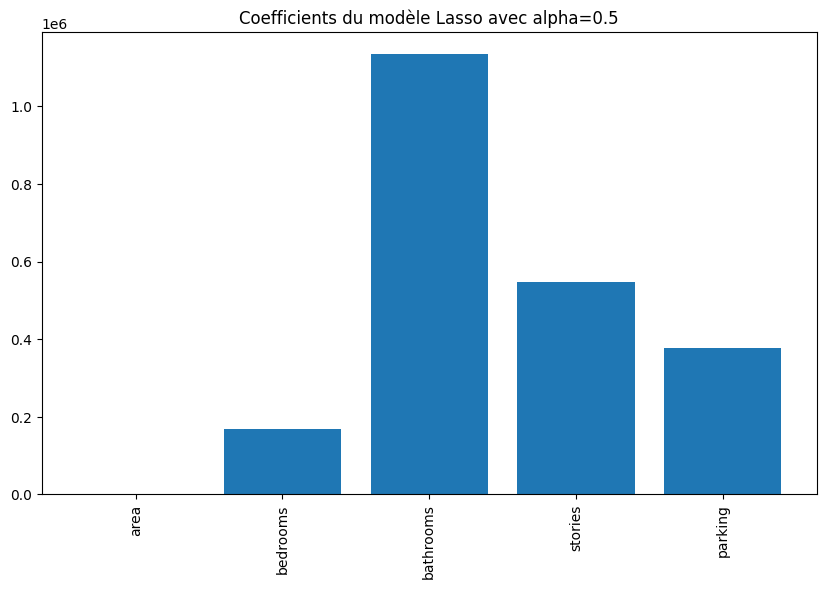

Coefficients du modèle Lasso avec alpha=1.0 : [3.31115868e+02 1.67809035e+05 1.13373694e+06 5.47939326e+05
 3.77595053e+05]


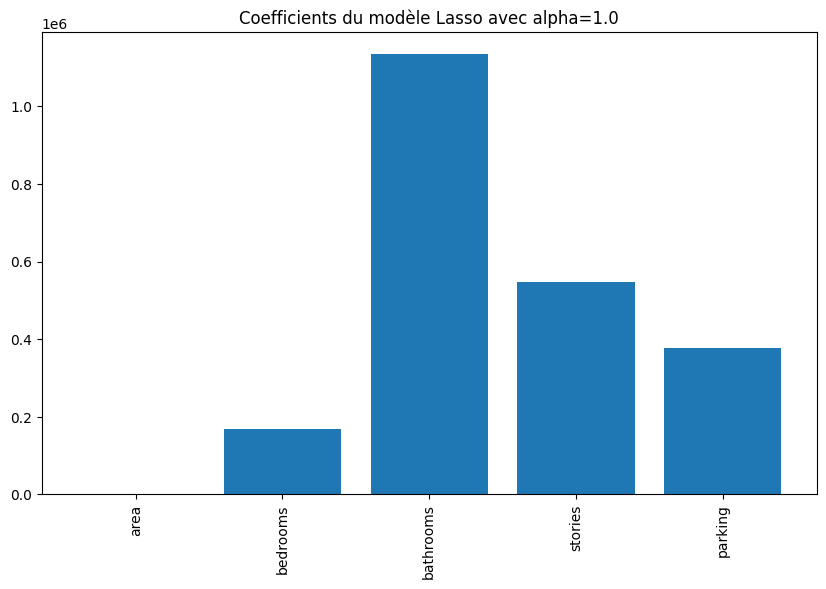

Coefficients du modèle Lasso avec alpha=1000 : [3.31488193e+02 1.67059545e+05 1.13052244e+06 5.47454899e+05
 3.76360169e+05]


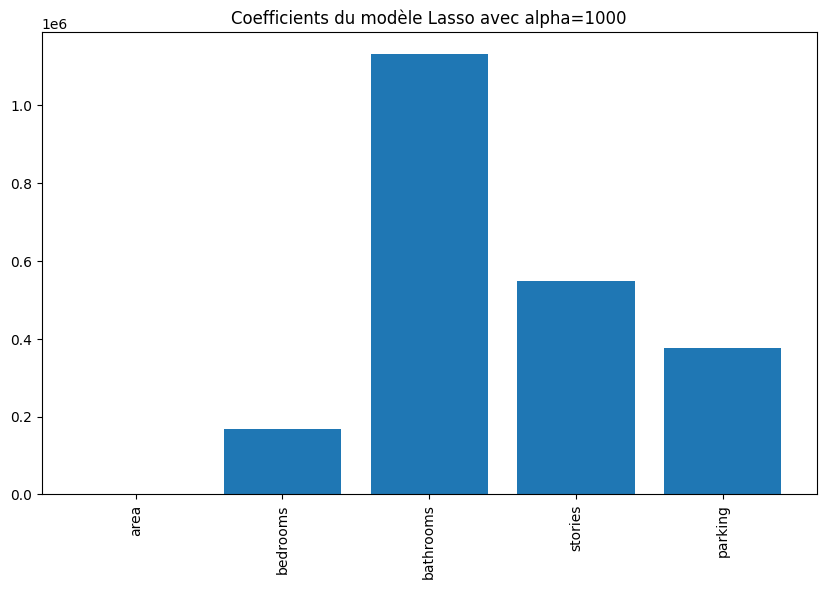

In [148]:
for alpha in [0.5, 1.0, 1000]:
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    print(f"Coefficients du modèle Lasso avec alpha={alpha} :", model.coef_)

    # Visualisation des coefficients pour chaque alpha
    plt.figure(figsize=(10, 6))
    plt.bar(X.columns, model.coef_)
    plt.xticks(rotation=90)
    plt.title(f"Coefficients du modèle Lasso avec alpha={alpha}")
    plt.show()